<a href="https://colab.research.google.com/github/0731325603/regression-predict-api-template/blob/master/After_adding_some_stuff_NEW_SENDY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sendy Logistics¶

The main objectives of this project :

Explorating and visualising the data, trying to get some insights about our dataset.

Getting data in better shape by feature engineering to help us in building better models.

Building and tuning regression models to get some stable results on predicting time from pick up to arrival.

Understanding the dataset is one of the critical parts when it comes to model building

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import io
import datetime
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Read train and test data from csv files for visualization
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')


In [3]:
train_data.head()


,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [4]:
test_data.head()


,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,1:53:27 PM,17,1,2:02:41 PM,17,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,11:34:45 AM,11,2,11:47:19 AM,11,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [5]:
descrip = pd.read_csv('VariableDefinitions.csv')
descrip.head(35) # 34 to display every description


,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31
5,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
6,Placement - Time,Placement - Time - Time of day the order was p...
7,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31
8,Confirmation - Weekday (Mo = 1),Confirmation - Weekday (Monday = 1)
9,Confirmation - Time,Confirmation - Time - Time of day the order wa...


In [6]:
samplesub = pd.read_csv('SampleSubmission.csv')
samplesub.head()


,Order_No,Time from Pickup to Arrival
0,Order_No_19248,567.0
1,Order_No_12736,4903.0
2,Order_No_768,5649.0
3,Order_No_15332,NaN
4,Order_No_21373,NaN


In [7]:
rider_data = pd.read_csv('Riders.csv')
rider_data.head()


,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [8]:
train_data.head(5)


,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [9]:
train_data.tail(5)


,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
21196,Order_No_8834,User_Id_2001,Bike,3,Personal,20,3,3:54:38 PM,20,3,3:55:09 PM,20,3,3:58:49 PM,20,3,4:20:08 PM,20,3,4:20:17 PM,3,28.6,NaN,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,9
21197,Order_No_22892,User_Id_1796,Bike,3,Business,13,6,10:13:34 AM,13,6,10:13:41 AM,13,6,10:20:04 AM,13,6,10:33:27 AM,13,6,10:46:17 AM,7,26.0,NaN,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,770
21198,Order_No_2831,User_Id_2956,Bike,3,Business,7,4,5:06:16 PM,7,4,5:07:09 PM,7,4,5:30:17 PM,7,4,5:50:52 PM,7,4,6:40:05 PM,20,29.2,NaN,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,2953
21199,Order_No_6174,User_Id_2524,Bike,1,Personal,4,3,9:31:39 AM,4,3,9:31:53 AM,4,3,9:38:59 AM,4,3,9:45:15 AM,4,3,10:08:15 AM,13,15.0,NaN,-1.250030,36.874167,-1.279209,36.794872,Rider_Id_347,1380
21200,Order_No_9836,User_Id_718,Bike,3,Business,26,2,2:19:47 PM,26,2,2:20:01 PM,26,2,2:24:29 PM,26,2,2:41:55 PM,26,2,3:17:23 PM,12,30.9,NaN,-1.255189,36.782203,-1.320157,36.830887,Rider_Id_177,2128


In [10]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [11]:
train_data.describe()


,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [12]:
train_data.shape


(21201, 29)

In [13]:
numerical_feature_columns = list(train_data._get_numeric_data().columns)
numerical_feature_columns


['Platform Type',
 'Placement - Day of Month',
 'Placement - Weekday (Mo = 1)',
 'Confirmation - Day of Month',
 'Confirmation - Weekday (Mo = 1)',
 'Arrival at Pickup - Day of Month',
 'Arrival at Pickup - Weekday (Mo = 1)',
 'Pickup - Day of Month',
 'Pickup - Weekday (Mo = 1)',
 'Arrival at Destination - Day of Month',
 'Arrival at Destination - Weekday (Mo = 1)',
 'Distance (KM)',
 'Temperature',
 'Precipitation in millimeters',
 'Pickup Lat',
 'Pickup Long',
 'Destination Lat',
 'Destination Long',
 'Time from Pickup to Arrival']

In [14]:
categorical_feature_columns = list(set(train_data.columns) -
                                   set(train_data._get_numeric_data().columns))
categorical_feature_columns


['Pickup - Time',
 'Confirmation - Time',
 'User Id',
 'Placement - Time',
 'Arrival at Destination - Time',
 'Personal or Business',
 'Order No',
 'Rider Id',
 'Vehicle Type',
 'Arrival at Pickup - Time']

A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.
Which shows a negative skewness, telling us that the mean and median of our data are less than the mode

The bin can be of any size

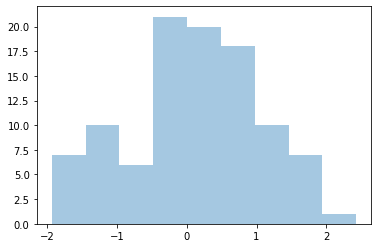

In [15]:
x = np.random.normal(size=100)
sns.distplot(x, kde=False)


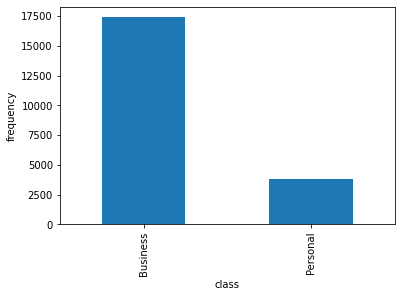

In [17]:
# Personal or Business – Customer type available at Sendy logistics
y_count = train_data['Personal or Business'].value_counts(sort=True)
y_count.plot(kind='bar')
plt.xlabel("class")
plt.ylabel("frequency")
plt.show()


"Personal": 1, "Business": 2

Sendy logistics business is mostly used for Business purposes.

In [18]:
# Getting the number of Orders in Sendy logistics
train_data['Order No'].nunique()


21201

In [19]:
# Getting the number of Users for Sendy logistics
train_data['User Id'].nunique()


3186

In [20]:
# Getting the number of Riders 
train_data['Rider Id'].nunique()


924

From this we can atleast assume that the number of Riders who accept the orders for Sendy Logistics is one of the factors that affect the production.
They have higher number of orders and higher number of customers but looking at the Riders doesnt match

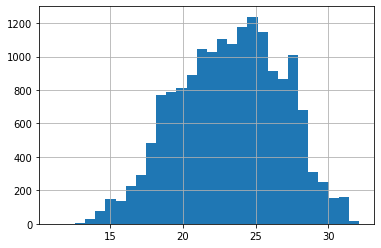

In [21]:
# Showing distribution of Temperature
train_data['Temperature'].hist(bins=30)



We can conclude that it varies between 12 and 32 but mostly it around 20 and 27 degrees celsius

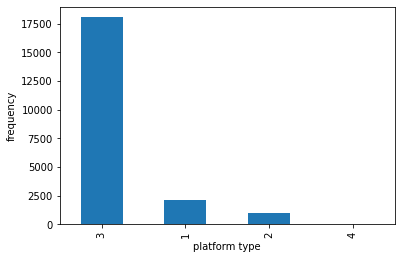

In [23]:
# Platform Type – Platform used to place the order, there are 4 types
y_count = train_data['Platform Type'].value_counts(sort=True)
y_count.plot(kind='bar')
plt.xlabel("platform type")
plt.ylabel("frequency")
plt.show()


Platform used to place the order, there are 4 types, but our analysis shows that the 4th one is not present and the mostly used platform is platform number 3

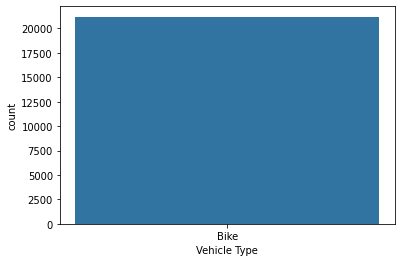

In [25]:
# Counting Vehicle type used by the logistics company
sns.countplot('Vehicle Type', data=train_data)


We will plot some important feature against our target.

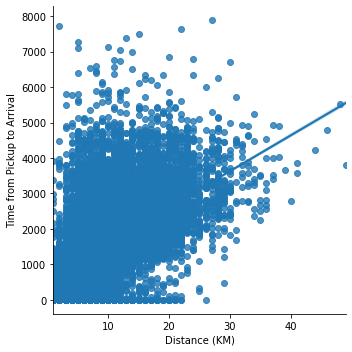

In [26]:
sns.lmplot('Distance (KM)', 'Time from Pickup to Arrival',
           data=train_data, fit_reg=True)


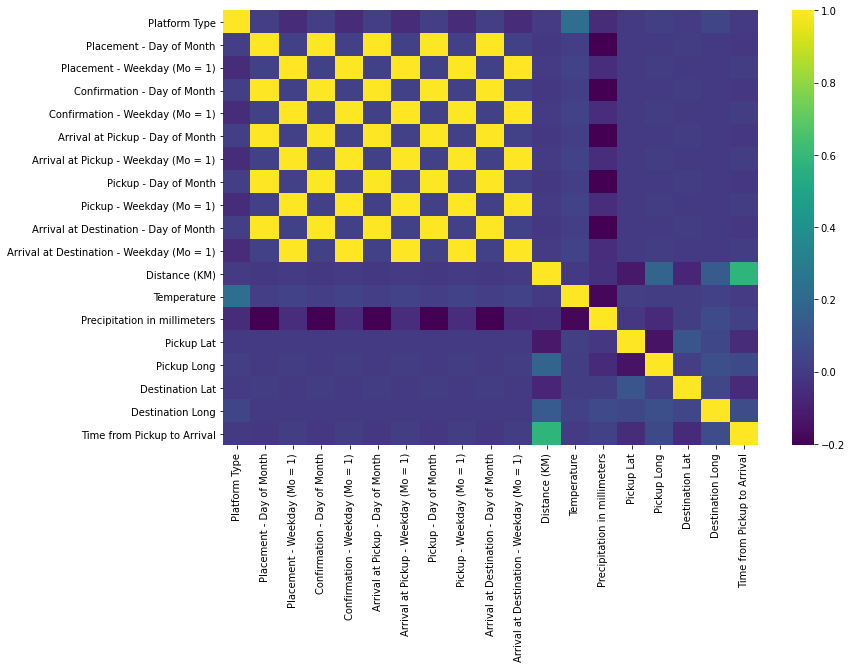

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), cmap='viridis')


## Linear Regression

In [0]:
import sklearn as skl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [0]:
#since the model could not convert string to float: '11:49:17 AM' we have to work with simple time

def convert_time(column):
    train_data[column] = pd.to_datetime(train_data[column])
    return (train_data[column] - pd.to_datetime(pd.to_datetime('today').date())).astype('timedelta64[s]')


In [0]:
train_data['Placement - Time'] = convert_time('Placement - Time')
train_data['Confirmation - Time'] = convert_time('Confirmation - Time')
train_data['Pickup - Time'] = convert_time('Pickup - Time')
train_data['Arrival at Pickup - Time'] = convert_time('Arrival at Pickup - Time')
train_data['Arrival at Destination - Time'] = convert_time('Arrival at Destination - Time')


In [0]:
train_data['Temperature'] = train_data['Temperature'].fillna((train_data['Temperature'].mean()))


In [33]:
#Dropping unnecessary variables

train_data.drop(['Order No', 'User Id','Rider Id','Precipitation in millimeters'], axis=1, inplace=True)
train_data.head()


,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
0,Bike,3,Business,9,5,34546.0,9,5,34810.0,9,5,36287.0,9,5,37650.0,9,5,38395.0,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,745
1,Bike,3,Personal,12,5,40576.0,12,5,41001.0,12,5,42022.0,12,5,42249.0,12,5,44242.0,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,1993
2,Bike,3,Business,30,2,45565.0,30,2,45764.0,30,2,46174.0,30,2,46383.0,30,2,46838.0,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,455
3,Bike,3,Business,15,5,33934.0,15,5,33965.0,15,5,34676.0,15,5,34986.0,15,5,36327.0,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,1341
4,Bike,1,Personal,13,1,35718.0,13,1,35778.0,13,1,36233.0,13,1,36323.0,13,1,37537.0,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,1214


In [0]:
#Inserting numerical variable instead of text for model to pick up numerical values

transport = {"Vehicle Type":     {"Bike": 1, "Other": 2},
                "Personal or Business": {"Personal": 1, "Business": 2,}}
                ###take out space
                

In [35]:
train_data.replace(transport, inplace=True)
train_data.head()


,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
0,1,3,2,9,5,34546.0,9,5,34810.0,9,5,36287.0,9,5,37650.0,9,5,38395.0,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,745
1,1,3,1,12,5,40576.0,12,5,41001.0,12,5,42022.0,12,5,42249.0,12,5,44242.0,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,1993
2,1,3,2,30,2,45565.0,30,2,45764.0,30,2,46174.0,30,2,46383.0,30,2,46838.0,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,455
3,1,3,2,15,5,33934.0,15,5,33965.0,15,5,34676.0,15,5,34986.0,15,5,36327.0,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,1341
4,1,1,1,13,1,35718.0,13,1,35778.0,13,1,36233.0,13,1,36323.0,13,1,37537.0,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,1214


In [36]:
X = train_data.drop(['Time from Pickup to Arrival'], axis=1)
Y = train_data['Time from Pickup to Arrival']

#splitting data into training and testing

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.35, random_state=5)
print("**********  features shape  **********\n")
print(X_train.shape)
print(X_test.shape)
print("****************************************")
print("\n**********  labels shape  **********\n")
print(Y_train.shape)
print(Y_test.shape)
print("****************************************")


**********  features shape  **********

(13780, 24)
(7421, 24)
****************************************

**********  labels shape  **********

(13780,)
(7421,)
****************************************


In [38]:
#Dependent variable continuous

Y_train


8566     1893
15543    4004
10646     445
4111     1531
20923    3861
         ... 
5520     1860
3046     4130
20463     500
18638     677
2915     2850
Name: Time from Pickup to Arrival, Length: 13780, dtype: int64

In [0]:
####First Feature column

# create a Python list of feature names

#feature_cols = ['Distance (KM)', 'Temperature']

# use the list to select a subset of the original DataFrame
#X = train_data[feature_cols]

###########

##Second feature column after realising that we didnt test for 
#the first time that how related they would be on y ('Time from Pickup to Arrival')

# create a Python list of feature names
feature_cols = ['Distance (KM)', 'Temperature', 'Confirmation - Day of Month']

# use the list to select a subset of the original DataFrame
X = train_data[feature_cols]

# select a Series from the DataFrame
y = train_data['Time from Pickup to Arrival']


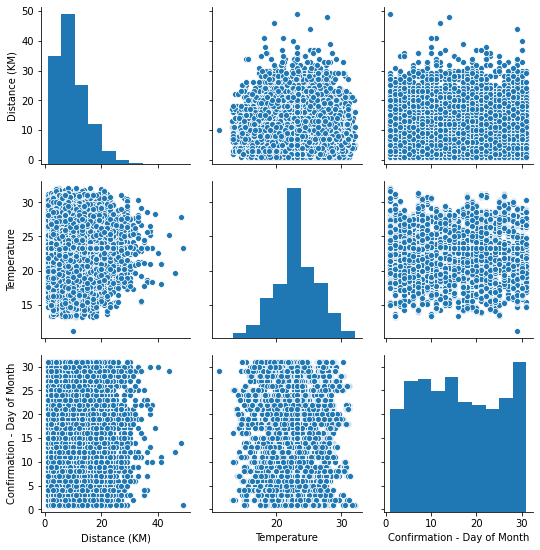

In [41]:
sns.pairplot( X);


Distance is not normally distributed and the deliveries range can raech 40 KM while temparature is normally distributed ,also note that temparature range from around 15 to 33.
Temperature and Distance (KM) have the impact on our y estimate

In [0]:
#Trying to get insight that after doing my 1st feature columns

In [42]:
#low multicollinearity between the features

X_train.corr()


,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long
Vehicle Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform Type,NaN,1.000000,0.714149,0.008269,-0.046397,-0.027013,0.008279,-0.046345,-0.023829,0.008279,-0.046345,-0.028651,0.008279,-0.046345,-0.024096,0.008279,-0.046345,-0.024096,0.009995,0.219916,-0.001783,0.016281,0.011808,0.054657
Personal or Business,NaN,0.714149,1.000000,0.001452,-0.042669,-0.033873,0.001463,-0.042608,-0.029421,0.001463,-0.042608,-0.035619,0.001463,-0.042608,-0.029437,0.001463,-0.042608,-0.029967,0.011579,0.207483,0.022654,0.030524,0.008450,0.066389
Placement - Day of Month,NaN,0.008269,0.001452,1.000000,0.028154,0.007981,0.999998,0.028112,0.008344,0.999998,0.028112,0.006931,0.999998,0.028112,0.006872,0.999998,0.028112,0.004404,-0.012488,0.011862,-0.008856,-0.007307,0.003986,-0.002785
Placement - Weekday (Mo = 1),NaN,-0.046397,-0.042669,0.028154,1.000000,-0.005311,0.028129,0.999926,-0.004401,0.028129,0.999926,-0.002167,0.028129,0.999926,-0.001088,0.028129,0.999926,0.000128,-0.001978,0.031250,0.006446,0.005948,-0.009629,-0.003348
Placement - Time,NaN,-0.027013,-0.033873,0.007981,-0.005311,1.000000,0.007984,-0.005297,0.993450,0.007984,-0.005297,0.990078,0.007984,-0.005297,0.987005,0.007984,-0.005297,0.980212,-0.041032,0.359548,0.061890,-0.039170,0.013671,-0.009879
Confirmation - Day of Month,NaN,0.008279,0.001463,0.999998,0.028129,0.007984,1.000000,0.028114,0.008348,1.000000,0.028114,0.006937,1.000000,0.028114,0.006877,1.000000,0.028114,0.004411,-0.012490,0.011865,-0.008846,-0.007300,0.003999,-0.002792
Confirmation - Weekday (Mo = 1),NaN,-0.046345,-0.042608,0.028112,0.999926,-0.005297,0.028114,1.000000,-0.004376,0.028114,1.000000,-0.002138,0.028114,1.000000,-0.001057,0.028114,1.000000,0.000167,-0.001991,0.031264,0.006501,0.005991,-0.009555,-0.003386
Confirmation - Time,NaN,-0.023829,-0.029421,0.008344,-0.004401,0.993450,0.008348,-0.004376,1.000000,0.008348,-0.004376,0.997143,0.008348,-0.004376,0.994175,0.008348,-0.004376,0.987736,-0.044259,0.357785,0.057663,-0.033413,0.012533,-0.007248
Arrival at Pickup - Day of Month,NaN,0.008279,0.001463,0.999998,0.028129,0.007984,1.000000,0.028114,0.008348,1.000000,0.028114,0.006937,1.000000,0.028114,0.006877,1.000000,0.028114,0.004411,-0.012490,0.011865,-0.008846,-0.007300,0.003999,-0.002792


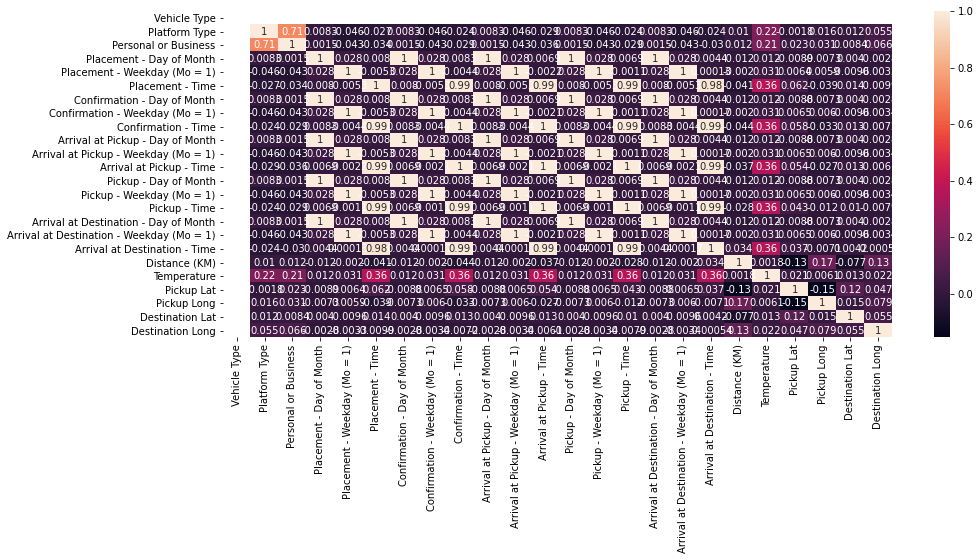

In [37]:
#Correlation of the X_train data

fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(X_train.corr(), annot = True)


In [0]:
#Shows that distance play a major role in for time from pickup to arrival

sns.lmplot(x='Time from Pickup to Arrival', y='Distance (KM)', data=train_data, ci=95, height=6, aspect=2);


In [47]:
#Creating a Linear regression object

model = LinearRegression()
model


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
#fitting the model
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#Checking the intercept

print(model.intercept_)

#Checking the coefficients of the independent variables

coeff_df = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficients'])
coeff_df


In [0]:
#getting the estimate of y

y_estimate = model.predict(X_test)


In [0]:
residuals = Y_test - y_estimate

After realising that actually the data coefficients(mentioned above) are more of the categorical variable ,then opt out to research about models that can handle categorical data

### Also looked at Random forest(with RMSE =753 using train_data ONLY)

In [0]:
#regressor = RandomForestRegressor(n_estimators=228,
#                                  max_depth=100,
#                                  max_features=4, min_samples_leaf=10,
#                                  min_samples_split=8,
#                                  random_state=0)
#regressor.fit(X_train, y_train)
#y_pred = regressor.predict(X_test)

In [0]:
#mean_squared_error(y_test/60, y_pred/60)  #157.60978552509135

In [0]:
#rms = sqrt(mean_squared_error(y_test, y_pred))
#print(rms)
#753.2564157644651

Reason which made us to let this one go its because it was leaving some required estimate unpredicted

 ### Regression Model (CatBoostRegressor)

Purpose of CatBoost

Training and applying models for the regression problems. When using the applying methods only the predicted class is returned. Provides compatibility with the scikit-learn tools.

Parameter and Description	Default value
metadata	The key-value string pairs to store in the model's metadata storage after the training.	None


cat_features	
A one-dimensional array of categorical columns indices (specified as integers) or names (specified as strings).

This array can contain both indices and names for different elements.

If any features in the cat_features parameter are specified as names instead of indices, feature names must be provided for the training dataset. Therefore, the type of the X parameter in the future calls of the fit function must be either catboost.Pool with defined feature names data or pandas.DataFrame with defined column names.

Note.
If this parameter is not None and the training dataset passed as the value of the X parameter to the fit function of this class has the catboost.Pool type, CatBoost checks the equivalence of the categorical features indices specification in this object and the one in the catboost.Pool object.

If this parameter is not None, passing objects of the catboost.FeaturesData type as the X parameter to the fit function of this class is prohibited.
None (all features are either considered numerical or of other types if specified precisely)

For Info : https://catboost.ai/docs/concepts/python-reference_catboostregressor.html

In [54]:
#To import a library that's not in Google Colab 
!pip install catboost

     |████████████████████████████████| 64.8MB 50kB/s 


In [0]:
#from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor,Pool, cv
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from math import sqrt
import catboost
import math

In [0]:
descrip =pd.read_csv('VariableDefinitions.csv')
train_data = pd.read_csv('Train.csv')
samplesub = pd.read_csv('SampleSubmission.csv')
riders = pd.read_csv('Riders.csv')
test_data = pd.read_csv('Test.csv')

In [57]:
train_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [58]:
test_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,1:53:27 PM,17,1,2:02:41 PM,17,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,11:34:45 AM,11,2,11:47:19 AM,11,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [59]:
# Merging datasets.
train = train_data.shape[0]
test = test_data.shape[0]

combined_data = pd.concat((train_data, test_data)).reset_index(drop=True)
print("combined_data size is : {}".format(combined_data.shape))

combined_data size is : (28269, 29)


In [60]:
# Checking merged shape
display(combined_data.shape)

(28269, 29)

In [61]:
# Checking features and target columns
display(combined_data.columns)

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [62]:
# Checking dtypes
#28269 entries with 29 columns
display(combined_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28269 entries, 0 to 28268
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   28269 non-null  object 
 1   User Id                                    28269 non-null  object 
 2   Vehicle Type                               28269 non-null  object 
 3   Platform Type                              28269 non-null  int64  
 4   Personal or Business                       28269 non-null  object 
 5   Placement - Day of Month                   28269 non-null  int64  
 6   Placement - Weekday (Mo = 1)               28269 non-null  int64  
 7   Placement - Time                           28269 non-null  object 
 8   Confirmation - Day of Month                28269 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            28269 non-null  int64  
 10  Confirmation - Time   

None

In [63]:
#low multicollinearity between the features 
combined_data.corr()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
Platform Type,1.000000,0.013958,-0.058637,0.013963,-0.058612,0.013963,-0.058612,0.013963,-0.058612,0.012770,-0.058005,0.005981,0.220127,-0.050634,-0.003386,0.019767,0.006558,0.042425,-0.003827
Placement - Day of Month,0.013958,1.000000,0.023910,0.999999,0.023890,0.999999,0.023890,0.999999,0.023890,0.999998,0.026122,-0.001978,0.008006,-0.223946,-0.005092,0.000761,0.003882,0.003052,-0.014710
Placement - Weekday (Mo = 1),-0.058637,0.023910,1.000000,0.023898,0.999964,0.023898,0.999964,0.023898,0.999964,0.026132,0.999952,0.009394,0.030172,-0.031377,0.000214,0.010483,0.002670,-0.000915,0.009693
Confirmation - Day of Month,0.013963,0.999999,0.023898,1.000000,0.023891,1.000000,0.023891,1.000000,0.023891,1.000000,0.026123,-0.001979,0.008007,-0.223946,-0.005087,0.000764,0.003888,0.003049,-0.014701
Confirmation - Weekday (Mo = 1),-0.058612,0.023890,0.999964,0.023891,1.000000,0.023891,1.000000,0.023891,1.000000,0.026123,1.000000,0.009388,0.030179,-0.031377,0.000241,0.010503,0.002706,-0.000934,0.009744
Arrival at Pickup - Day of Month,0.013963,0.999999,0.023898,1.000000,0.023891,1.000000,0.023891,1.000000,0.023891,1.000000,0.026123,-0.001979,0.008007,-0.223946,-0.005087,0.000764,0.003888,0.003049,-0.014701
Arrival at Pickup - Weekday (Mo = 1),-0.058612,0.023890,0.999964,0.023891,1.000000,0.023891,1.000000,0.023891,1.000000,0.026123,1.000000,0.009388,0.030179,-0.031377,0.000241,0.010503,0.002706,-0.000934,0.009744
Pickup - Day of Month,0.013963,0.999999,0.023898,1.000000,0.023891,1.000000,0.023891,1.000000,0.023891,1.000000,0.026123,-0.001979,0.008007,-0.223946,-0.005087,0.000764,0.003888,0.003049,-0.014701
Pickup - Weekday (Mo = 1),-0.058612,0.023890,0.999964,0.023891,1.000000,0.023891,1.000000,0.023891,1.000000,0.026123,1.000000,0.009388,0.030179,-0.031377,0.000241,0.010503,0.002706,-0.000934,0.009744
Arrival at Destination - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013099,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701


In [64]:
#Finding numerical columns
numerical_feature_columns = list(combined_data._get_numeric_data().columns)
numerical_feature_columns

['Platform Type',
 'Placement - Day of Month',
 'Placement - Weekday (Mo = 1)',
 'Confirmation - Day of Month',
 'Confirmation - Weekday (Mo = 1)',
 'Arrival at Pickup - Day of Month',
 'Arrival at Pickup - Weekday (Mo = 1)',
 'Pickup - Day of Month',
 'Pickup - Weekday (Mo = 1)',
 'Arrival at Destination - Day of Month',
 'Arrival at Destination - Weekday (Mo = 1)',
 'Distance (KM)',
 'Temperature',
 'Precipitation in millimeters',
 'Pickup Lat',
 'Pickup Long',
 'Destination Lat',
 'Destination Long',
 'Time from Pickup to Arrival']

In [65]:
#Looking Categorical columns 
categorical_feature_columns = list(set(train_data.columns) - set(train_data._get_numeric_data().columns))
categorical_feature_columns

['Pickup - Time',
 'Confirmation - Time',
 'User Id',
 'Placement - Time',
 'Arrival at Destination - Time',
 'Personal or Business',
 'Order No',
 'Rider Id',
 'Vehicle Type',
 'Arrival at Pickup - Time']

In [0]:
combined_data['Placement_Datetime'] = pd.to_datetime(combined_data['Placement - Time'])
combined_data.loc[:, 'Placement_Date'] = combined_data['Placement_Datetime'].dt.date
combined_data['Confirmation_datetime'] = pd.to_datetime(combined_data['Confirmation - Time'])
combined_data['Trip_Duration'] = (combined_data['Confirmation_datetime'] -combined_data['Placement_Datetime']).map(lambda x: x.total_seconds())

combined_data.drop(["Confirmation_datetime","Placement_Date","Placement_Datetime"],axis =1,inplace = True)

In [0]:
combined_data.drop(["Arrival at Destination - Day of Month","Arrival at Destination - Weekday (Mo = 1)","Arrival at Destination - Time"],
              axis = 1,inplace =True)

In [68]:
combined_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,Trip_Duration
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0,264.0
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0,425.0
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0,199.0
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0,31.0
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0,60.0


In [0]:
combined_data.drop('Trip_Duration',axis = 1,inplace = True)

In [0]:
combined_data = pd.merge(combined_data,riders,how = 'left',on = ['Rider Id'])

In [71]:
combined_data.isnull().sum()

Order No                                    0
User Id                                     0
Vehicle Type                                0
Platform Type                               0
Personal or Business                        0
Placement - Day of Month                    0
Placement - Weekday (Mo = 1)                0
Placement - Time                            0
Confirmation - Day of Month                 0
Confirmation - Weekday (Mo = 1)             0
Confirmation - Time                         0
Arrival at Pickup - Day of Month            0
Arrival at Pickup - Weekday (Mo = 1)        0
Arrival at Pickup - Time                    0
Pickup - Day of Month                       0
Pickup - Weekday (Mo = 1)                   0
Pickup - Time                               0
Distance (KM)                               0
Temperature                              5803
Precipitation in millimeters            27518
Pickup Lat                                  0
Pickup Long                       

In [0]:
#Decide to use mean since discovered that Temperature will play a role in our prediction
combined_data['Temperature'] = combined_data['Temperature'].fillna((combined_data['Temperature'].mean()))

In [0]:
combined_data['Precipitation in millimeters'] = combined_data['Precipitation in millimeters'].fillna(0)

We realized that we had 28269 entries and precipitation column have a total of 27518 entries (97%) which are missing and it would not make sense to use five number summary towards such a column

In [74]:
combined_data.isnull().sum()

Order No                                   0
User Id                                    0
Vehicle Type                               0
Platform Type                              0
Personal or Business                       0
Placement - Day of Month                   0
Placement - Weekday (Mo = 1)               0
Placement - Time                           0
Confirmation - Day of Month                0
Confirmation - Weekday (Mo = 1)            0
Confirmation - Time                        0
Arrival at Pickup - Day of Month           0
Arrival at Pickup - Weekday (Mo = 1)       0
Arrival at Pickup - Time                   0
Pickup - Day of Month                      0
Pickup - Weekday (Mo = 1)                  0
Pickup - Time                              0
Distance (KM)                              0
Temperature                                0
Precipitation in millimeters               0
Pickup Lat                                 0
Pickup Long                                0
Destinatio

In [0]:
combined_data['Arrival at Pickup - Time'] = pd.to_datetime(combined_data['Arrival at Pickup - Time'])
combined_data['A_hour'] = combined_data['Arrival at Pickup - Time'].dt.hour
combined_data['A_seconds'] = combined_data['Arrival at Pickup - Time'].dt.second
combined_data['A_minutes'] = combined_data['Arrival at Pickup - Time'].dt.minute
combined_data['am_or_pm_confirm'] = combined_data['Confirmation - Time'].astype('str').apply(lambda x:x.split(' ')[-1])

In [0]:
combined_data['Confirmation - Time'] = pd.to_datetime(combined_data['Confirmation - Time'])

In [0]:
combined_data['C_hour'] = combined_data['Confirmation - Time'].dt.hour
combined_data['C_min'] = combined_data['Confirmation - Time'].dt.minute
combined_data['C_sec'] = combined_data['Confirmation - Time'].dt.second

In [78]:
combined_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,A_hour,A_seconds,A_minutes,am_or_pm_confirm,C_hour,C_min,C_sec
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,2020-05-28 09:40:10,9,5,2020-05-28 10:04:47,9,5,10:27:30 AM,4,20.400000,0.0,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0,1637,1309,13.8,549,10,47,4,AM,9,40,10
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,2020-05-28 11:23:21,12,5,2020-05-28 11:40:22,12,5,11:44:09 AM,16,26.400000,0.0,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0,396,339,13.6,69,11,22,40,AM,11,23,21
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,2020-05-28 12:42:44,30,2,2020-05-28 12:49:34,30,2,12:53:03 PM,3,23.255689,0.0,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0,1023,242,12.5,114,12,34,49,PM,12,42,44
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,2020-05-28 09:26:05,15,5,2020-05-28 09:37:56,15,5,9:43:06 AM,9,19.200000,0.0,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0,886,283,14.5,113,9,56,37,AM,9,26,5
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,2020-05-28 09:56:18,13,1,2020-05-28 10:03:53,13,1,10:05:23 AM,9,15.400000,0.0,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0,2311,872,14.1,533,10,53,3,AM,9,56,18


In [0]:
combined_data.drop(['Arrival at Pickup - Time','Confirmation - Time'],axis = 1,inplace = True)

In [0]:
combined_data.drop('Order No',axis =1,inplace = True)

In [81]:
combined_data.isnull().sum()

User Id                                    0
Vehicle Type                               0
Platform Type                              0
Personal or Business                       0
Placement - Day of Month                   0
Placement - Weekday (Mo = 1)               0
Placement - Time                           0
Confirmation - Day of Month                0
Confirmation - Weekday (Mo = 1)            0
Arrival at Pickup - Day of Month           0
Arrival at Pickup - Weekday (Mo = 1)       0
Pickup - Day of Month                      0
Pickup - Weekday (Mo = 1)                  0
Pickup - Time                              0
Distance (KM)                              0
Temperature                                0
Precipitation in millimeters               0
Pickup Lat                                 0
Pickup Long                                0
Destination Lat                            0
Destination Long                           0
Rider Id                                   0
Time from 

In [0]:
combined_data.drop(['Pickup - Time','Placement - Time','Rider Id'],axis =1,inplace = True)

In [0]:
transport = {"Vehicle Type":     {"Bike": 1, "Other": 2},
                "Personal or Business": {"Personal": 1, "Business": 2,}}

In [0]:
combined_data.replace(transport, inplace=True)

In [0]:
combined_data = pd.get_dummies(combined_data)

In [0]:
#Get the new dataset
train_data = combined_data[:train]
test_data = combined_data[train:]

In [87]:
test_data.drop("Time from Pickup to Arrival",axis = 1,inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Model (CatBoost Regressor)

Boosting is a sequential process, where each subsequent model attempts to correct the errors of the previous model. The succeeding models are dependent on the previous model.

#### Data Splitting

In [0]:
#Creating a training set for modeling and validation set to check model performance
X = train_data.drop(columns='Time from Pickup to Arrival')
Y = train_data['Time from Pickup to Arrival']

#### Model Cross-Validation

Cross-validation is a technique used to protect against overfitting in a predictive model, particularly in a case where the amount of data may be limited.
https://stats.stackexchange.com/questions/1826/cross-validation-in-plain-english

Overfitting a model is a condition where a statistical model begins to describe the random error in the data rather than the relationships between variables
https://statisticsbyjim.com/regression/overfitting-regression-models/

How to avoid overfitting:
You should draw a random sample that is large enough to handle all of the terms that you expect to include in your model. This process requires that you investigate similar studies before you collect data. The goal is to identify relevant variables and terms that you are likely to include in your own model

TO NOTE :
Cross validation with sklearn folds
Catboost can use the sklearn folds: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

Consider three variants of sklearn folds: ShuffleSplit, RepeatedKFold, and StratifiedShuffleSplit.

Note that parameters stratified and type are ignored in this case.

##### Train_Test Split approach

 Randomly split the complete data into training and test sets. Then Perform the model training on the training set and use the test set for validation purpose, ideally split the data into 70:30 or 80:20.
 
NOTE:
In this approach there is a possibility of high bias if we have limited data, because we would miss some information about the data which we have not used for training. If our data is huge and our test sample and train sample has the same distribution then this approach is acceptable.

Complete documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

##### Repeated k-fold cross-validation

Repeats K-Fold n times with different randomization in each repetition.
Results in a less biased model compare to other methods. Because it ensures that every observation from the original dataset has the chance of appearing in training and test set. This is one among the best approach if we have a limited input data

We use the built in cross_val_score (returns score of each test folds)/corss_val_predict (returns the predicted score for each observation in the input dataset when it was part of the test set) from the scikit_learn library.

In [0]:
#### I dont know whether Reapeted K fold supposed to be placed here or what anyone with an idea please fix

In [91]:
#Look at the data type of variables
print(X.dtypes)
categorical_features_indices = np.where(X.dtypes != np.float)[0]

Vehicle Type                    int64
Platform Type                   int64
Personal or Business            int64
Placement - Day of Month        int64
Placement - Weekday (Mo = 1)    int64
                                ...  
User Id_User_Id_997             uint8
User Id_User_Id_998             uint8
User Id_User_Id_999             uint8
am_or_pm_confirm_AM             uint8
am_or_pm_confirm_PM             uint8
Length: 3812, dtype: object


#### Model Training


In [0]:
regressor = CatBoostRegressor(iterations=600,
                              learning_rate=0.1,
                              depth=4,
                              l2_leaf_reg=10,
                              bootstrap_type='Bernoulli',
                              subsample=0.7,
                              leaf_estimation_iterations=10,
                              metric_period=20,
                              od_type='Iter',
                              od_wait=45,
                              random_seed=42,
                              loss_function='RMSE',
                              allow_writing_files=False)

In [93]:
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std

regressor = CatBoostRegressor(verbose=0, n_estimators=800)
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
n_scores = cross_val_score(regressor, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -512.569 (11.821)


*   having n_split > 10 doesnt help on any further gain
*   without reapeted K-fold cross validation the score RMSE is 740.079235422253


*   with reapeted K-fold cross validation the RMSE score is 736
*   when verbose = True and n_estimators=100 the RMSE score is 742


*   when verbose =0 keeping n_estimators the same the RMSE score the same,while increasing n_estimators it shift to better much score.Beyond 800 n_estimates the model start to underperform.

### Model fitting

In [94]:
regressor.fit(train_data.drop(['Time from Pickup to Arrival'], axis =1), train_data['Time from Pickup to Arrival'])

In [95]:
#Getting a score for our model runed on the train_data
print(regressor.get_best_score())

{'learn': {'RMSE': 678.4852991188085}}


### Model Applying

Now, the next task is to predict the outcome for test data set.

In [0]:
regressor.predict(test_data)
import pickle
save_path = 'sendy_regression.pkl'
pickle.dump(regressor,open('sendy.pkl','wb'))


In [97]:
#Getting a score for our model runed on the test_data
print(regressor.get_best_score())


{'learn': {'RMSE': 678.4852991188085}}


In [98]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round( regressor.feature_importances_,2)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)


,importance
feature,
Distance (KM),39.66
Average_Rating,6.93
Destination Lat,6.76
Pickup Lat,6.04
No_Of_Orders,5.99
Age,5.61
No_of_Ratings,4.79
Destination Long,3.50
Pickup Long,2.77


Importance tells us that how much do these features relate to our model,and since we had perfomed EDA and already expected that distance should play a major role in our column our model support our argument

In [0]:
pred = pd.DataFrame(regressor.predict(test_data),columns= ['Time from Pickup to Arrival' ])

In [0]:
pred = pd.concat([samplesub['Order_No'], pred], axis =1)

In [101]:
pred.head()

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,1411.244389
1,Order_No_12736,1311.864582
2,Order_No_768,1358.229415
3,Order_No_15332,1045.331598
4,Order_No_21373,1239.635618


In [0]:
pred.to_csv("surv113.csv", index = False)

RMSE of 735.832114844119 on Zindi


## For more:

## Description of the Catboost crossvalidation :
If type='Inverted', then each test set consists of k-1 folds, and the corresponding train set consists of the remaining fold.

If type='Classical', then each test set consists of a single fold, and the corresponding train set consists of the remaining k-1 folds.

If type=TimeSeries, then each train set consists of the first k folds, and the corresponding test set consists of the (k+1)-th fold.Usually, this type of folds reduces standard deviation of loss value, if order of rows in the dataset is important.

The CatBoost cross validation function is intended for cross-validation only, it can not be used for tuning parameter.
The dataset is split into N folds. N–1 folds are used for training and one fold is used for model performance estimation. At each iteration, the model is evaluated on all N folds independently. The average score with standard deviation is computed for each iteration.

The only parameter that can be selected based on cross-validation is the number of iterations. Select the best iteration based on the information of the cv results and train the final model with this number of iterations.

More can be done in our model to give us a better score.For example we can work out the distance using Latitude and Longitude